In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from tensorflow.keras.utils import plot_model
from keras.models import load_model
import tensorflow as tf


import pandas as pd
import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
import warnings
import os
import cv2
warnings.filterwarnings("ignore")

2023-12-07 10:43:09.471944: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/adityasingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Daily life image sequences

In [49]:
# Specify the path to the root directory containing the folders
image_prefix = "adl-"
image_suffix = "-cam0-rgb-"
image_ext = ".png"
root_path = "./data/adl_imgs_rgb/"
total_seq = 40
target_size = (64, 64)

# Initialize an empty list to store the image arrays for each folder
image_arrays = []

# Iterate through each folder
image_name_list = []
for i in range(1, total_seq+1):
    if i<10:
        s = '0' + str(i)
    else:
        s = str(i)
    file_regex = image_prefix + s + image_suffix
    image_name_list = []
    for file_name in os.listdir(root_path):
        if file_regex not in file_name:
            continue
        image_name_list.append(file_name)
        
    image_name_list = sorted(image_name_list)

    # Initialize an empty list to store the images for the current folder
    print(f"Image name list for seq {i} is {len(image_name_list)}")
    folder_images = []

    number_set = set()

    for k in range(len(image_name_list)):
        if k in number_set:
            continue

        for j in range(k, len(image_name_list),5):
            if j in number_set:
                continue
            number_set.add(j)
            image_path = root_path + image_name_list[j]

            # Read the image using OpenCV (assuming the images are grayscale)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, target_size)

            # Append the image to the list
            folder_images.append(image)
            if len(folder_images) == 20:
                folder_array = np.array(folder_images)
                image_arrays.append(folder_array) 
                folder_images = []
                break
        folder_images = []

Image name list for seq 1 is 150
Image name list for seq 2 is 180
Image name list for seq 3 is 180
Image name list for seq 4 is 150
Image name list for seq 5 is 180
Image name list for seq 6 is 230
Image name list for seq 7 is 180
Image name list for seq 8 is 180
Image name list for seq 9 is 150
Image name list for seq 10 is 300
Image name list for seq 11 is 300
Image name list for seq 12 is 250
Image name list for seq 13 is 265
Image name list for seq 14 is 235
Image name list for seq 15 is 275
Image name list for seq 16 is 240
Image name list for seq 17 is 230
Image name list for seq 18 is 265
Image name list for seq 19 is 250
Image name list for seq 20 is 270
Image name list for seq 21 is 280
Image name list for seq 22 is 240
Image name list for seq 23 is 220
Image name list for seq 24 is 70
Image name list for seq 25 is 110
Image name list for seq 26 is 95
Image name list for seq 27 is 100
Image name list for seq 28 is 85
Image name list for seq 29 is 125
Image name list for seq 30

In [50]:
# Specify the path to the root directory containing the folders
image_prefix = "fall-"
image_suffix = "-cam0-rgb-"
image_ext = ".png"
root_path = "./data/fall_imgs_rgb/"
total_seq = 30
target_size = (64, 64)

image_name_list = []
# Iterate through each folder
for i in range(1, total_seq+1):
    if i<10:
        s = '0' + str(i)
    else:
        s = str(i)
    file_regex = image_prefix + s + image_suffix
    image_name_list = []
    for file_name in os.listdir(root_path):
        if file_regex not in file_name:
            continue
        image_name_list.append(file_name)
        
    image_name_list = sorted(image_name_list)
    print(f"Image name list for seq {i} is {len(image_name_list)}")
    # Initialize an empty list to store the images for the current folder
    folder_images = []

    number_set = set()

    for k in range(len(image_name_list)):
        if k in number_set:
            continue

        for j in range(k, len(image_name_list), 5):
            if j in number_set:
                continue
            number_set.add(j)
            image_path = root_path + image_name_list[j]

            # Read the image using OpenCV (assuming the images are grayscale)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, target_size)

            # Append the image to the list
            folder_images.append(image)
            if len(folder_images) == 20:
#                 print(k, j)
                folder_array = np.array(folder_images)
                image_arrays.append(folder_array) 
                folder_images = []
        folder_images = []

Image name list for seq 1 is 160
Image name list for seq 2 is 110
Image name list for seq 3 is 215
Image name list for seq 4 is 96
Image name list for seq 5 is 151
Image name list for seq 6 is 100
Image name list for seq 7 is 156
Image name list for seq 8 is 91
Image name list for seq 9 is 185
Image name list for seq 10 is 130
Image name list for seq 11 is 130
Image name list for seq 12 is 110
Image name list for seq 13 is 85
Image name list for seq 14 is 61
Image name list for seq 15 is 71
Image name list for seq 16 is 55
Image name list for seq 17 is 95
Image name list for seq 18 is 65
Image name list for seq 19 is 100
Image name list for seq 20 is 110
Image name list for seq 21 is 55
Image name list for seq 22 is 56
Image name list for seq 23 is 75
Image name list for seq 24 is 60
Image name list for seq 25 is 85
Image name list for seq 26 is 61
Image name list for seq 27 is 92
Image name list for seq 28 is 66
Image name list for seq 29 is 99
Image name list for seq 30 is 70


In [51]:
# # Specify the path to the root directory containing the folders
# image_prefix = "adl-"
# image_suffix = "-cam0-rgb-"
# image_ext = ".png"
# root_path = "./data/adl_imgs_rgb/"
# total_seq = 40
# target_size = (64, 64)

# # Initialize an empty list to store the image arrays for each folder
# image_arrays = []

# # Iterate through each folder
# for i in range(1, total_seq+1):
#     if i<10:
#         s = '0' + str(i)
#     else:
#         s = str(i)
#     file_regex = image_prefix + s + image_suffix
#     image_name_list = []
#     for file_name in os.listdir(root_path):
#         if file_regex not in file_name:
#             continue
#         image_name_list.append(file_name)
        
#     image_name_list = sorted(image_name_list)

#     # Initialize an empty list to store the images for the current folder
#     folder_images = []

#     # Iterate through each image in the folder
#     for image_name in image_name_list:
#         image_path = root_path + image_name

#         # Read the image using OpenCV (assuming the images are grayscale)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         image = cv2.resize(image, target_size)

#         # Append the image to the list
#         folder_images.append(image)
#         if len(folder_images) == 15:
#             folder_array = np.array(folder_images)
#             image_arrays.append(folder_array) 
#             folder_images = []

#     # Convert the list of images into a NumPy array
#     if len(folder_images) == 15:
#         folder_array = np.array(folder_images)
#         image_arrays.append(folder_array)

## Fall images sequences

In [52]:
# # Specify the path to the root directory containing the folders
# image_prefix = "fall-"
# image_suffix = "-cam0-rgb-"
# image_ext = ".png"
# root_path = "./data/fall_imgs_rgb/"
# total_seq = 30
# target_size = (64, 64)

# # Iterate through each folder
# for i in range(1, total_seq+1):
#     if i<10:
#         s = '0' + str(i)
#     else:
#         s = str(i)
#     file_regex = image_prefix + s + image_suffix
#     image_name_list = []
#     for file_name in os.listdir(root_path):
#         if file_regex not in file_name:
#             continue
#         image_name_list.append(file_name)
        
#     image_name_list = sorted(image_name_list)

#     # Initialize an empty list to store the images for the current folder
#     folder_images = []

#     # Iterate through each image in the folder
#     for image_name in image_name_list:
#         image_path = root_path + image_name

#         # Read the image using OpenCV (assuming the images are grayscale)
#         image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#         image = cv2.resize(image, target_size)

#         # Append the image to the list
#         folder_images.append(image)
#         if len(folder_images) == 15:
#             folder_array = np.array(folder_images)
#             image_arrays.append(folder_array) 
#             folder_images = []

#     # Convert the list of images into a NumPy array
#     if len(folder_images) == 15:
#         folder_array = np.array(folder_images)
#         image_arrays.append(folder_array)

In [53]:
dataset = np.array(image_arrays)

In [55]:
# Save the array
np.save('next_frame_prediction_dataset_20_frames_rgb_with_5_skips.npy', dataset)

In [61]:
# Load the array
dataset = np.load('next_frame_prediction_dataset_20_frames_rgb_with_5_skips.npy')

In [62]:
print("Shape of the final array:", dataset.shape)

Shape of the final array: (420, 20, 64, 64)


In [63]:
# Swap the axes representing the number of frames and number of data samples.

# not needed
#dataset = np.swapaxes(dataset, 0, 1)

In [64]:
# Add a channel dimension since the images are grayscale.
dataset = np.expand_dims(dataset, axis=-1)

In [71]:
# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(1 * dataset.shape[0])]
val_index = indexes[int(1 * dataset.shape[0]) :]

In [72]:
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

In [73]:
# Normalize the data to the 0-1 range.
train_dataset = train_dataset / 255
val_dataset = val_dataset / 255

In [74]:
# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y

In [75]:
# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

In [76]:
# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (420, 19, 64, 64, 1), (420, 19, 64, 64, 1)
Validation Dataset Shapes: (0, 19, 64, 64, 1), (0, 19, 64, 64, 1)


Displaying frames for example 215.


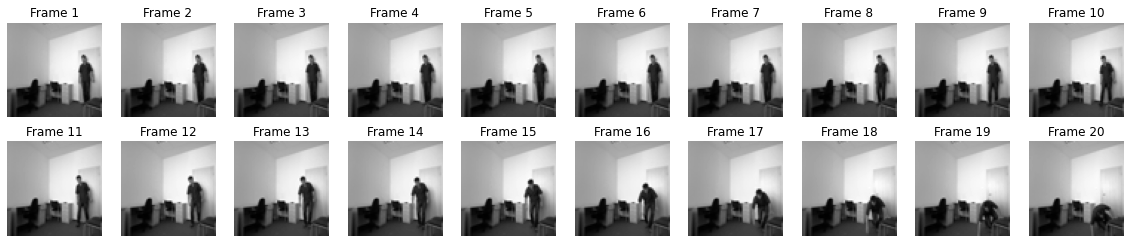

In [81]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
)

In [ ]:
print(model.summary())

In [ ]:
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

In [ ]:
# Check GPU availability (optional)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU devices found. Make sure you have a compatible GPU and installed the necessary drivers.")

In [ ]:
# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

In [ ]:
# Save the entire model to a file
model.save('trained_next_frame_prediction_model.h5')

In [59]:
model = load_model('trained_next_frame_prediction_model_complete_data_20_frames_rgb_skip.h5')

1/1 [==============================] - 1s 712ms/step


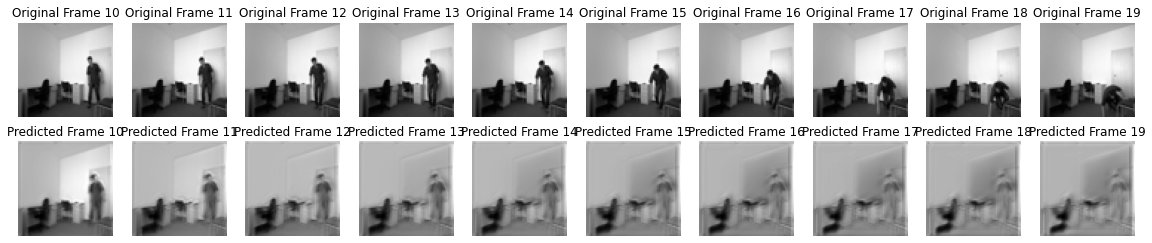

In [86]:
# Select a random example from the validation dataset.
# example = train_dataset[np.random.choice(range(len(train_dataset)), size=1)[0]]
example = train_dataset[215]

# Pick the first/last seven frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

# Predict a new set of 10 frames.
for _ in range(10):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Original Frame {idx + 10}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[10:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    ax.set_title(f"Predicted Frame {idx + 10}")
    ax.axis("off")

# Display the figure.
plt.show()

In [94]:
# Select a few random examples from the dataset.
choices = np.random.choice(range(len(train_dataset)), size=5)
examples = train_dataset[choices]

# Directory to save the generated GIFs
output_directory = "output_gifs"
os.makedirs(output_directory, exist_ok=True)

# Iterate over the examples and predict the frames.
predicted_videos = []
for ii, example in enumerate(examples):
    # Pick the first/last ten frames from the example.
    frames = example[:10, ...]
    original_frames = example[10:, ...]
    new_predictions = np.zeros(shape=(10, *frames[0].shape))

    # Predict a new set of 10 frames.
    for i in range(10):
        # Extract the model's prediction and post-process it.
        frames = example[: 10 + i + 1, ...]
        new_prediction = model.predict(np.expand_dims(frames, axis=0))
        new_prediction = np.squeeze(new_prediction, axis=0)
        predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

        # Extend the set of prediction frames.
        new_predictions[i] = predicted_frame

    # Create and save GIFs for each of the ground truth/prediction images.
    for idx, frame_set in enumerate([frames, original_frames, new_predictions]):
        # Construct a GIF from the selected video frames.
        current_frames = np.squeeze(frame_set)
        current_frames = current_frames[..., np.newaxis] * np.ones(3)
        current_frames = (current_frames * 255).astype(np.uint8)
        current_frames = list(current_frames)

        # Construct a GIF from the frames.
        with io.BytesIO() as gif:
            imageio.mimsave(gif, current_frames, "GIF", duration=200)
            
            # Save the GIF to the output directory
            if idx == 1:
                gif_path = os.path.join(output_directory, f"original_gif_{choices[ii]}.gif")
            elif idx == 2:
                gif_path = os.path.join(output_directory, f"generated_gif_{choices[ii]}.gif")
            else:
                gif_path = os.path.join(output_directory, f"first_10_frames_gif_{choices[ii]}.gif")
            with open(gif_path, "wb") as f:
                f.write(gif.getvalue())
            
            predicted_videos.append(gif.getvalue())           
            

# Display the videos.
print(" Truth\tPrediction")
for i in range(0, len(predicted_videos), 3):
    # Construct and display an `HBox` with the ground truth and prediction.
    box = HBox(
        [
            widgets.Image(value=predicted_videos[i]),
            widgets.Image(value=predicted_videos[i + 1]),
            widgets.Image(value=predicted_videos[i + 2])
        ]
    )
    display(box)

1/1 [==============================] - 1s 898ms/step
 Truth	Prediction
